In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE=32
CHANNELS =3
EPOCHS =50

In [3]:
 dataset =tf.keras.preprocessing.image_dataset_from_directory("",
                                                   shuffle=True,
                                                   image_size = (IMAGE_SIZE,IMAGE_SIZE),
                                                  batch_size = BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names 
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
68*32

2176

In [7]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 2 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 2 0 1 0 1 1]


In [8]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[165. 149. 159.]
  [146. 130. 140.]
  [150. 134. 144.]
  ...
  [ 63.  60.  67.]
  [ 62.  59.  66.]
  [ 61.  58.  65.]]

 [[156. 140. 150.]
  [150. 134. 144.]
  [156. 140. 150.]
  ...
  [ 66.  63.  70.]
  [ 64.  59.  66.]
  [ 60.  57.  64.]]

 [[151. 135. 145.]
  [156. 140. 150.]
  [161. 145. 155.]
  ...
  [ 74.  69.  76.]
  [ 73.  66.  74.]
  [ 73.  68.  75.]]

 ...

 [[181. 166. 171.]
  [177. 162. 167.]
  [173. 158. 163.]
  ...
  [157. 137. 146.]
  [157. 137. 146.]
  [160. 140. 149.]]

 [[183. 168. 173.]
  [179. 164. 169.]
  [175. 160. 165.]
  ...
  [159. 139. 148.]
  [160. 140. 149.]
  [165. 145. 154.]]

 [[183. 168. 173.]
  [180. 165. 170.]
  [177. 162. 167.]
  ...
  [158. 138. 147.]
  [155. 135. 144.]
  [158. 138. 147.]]]


In [9]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


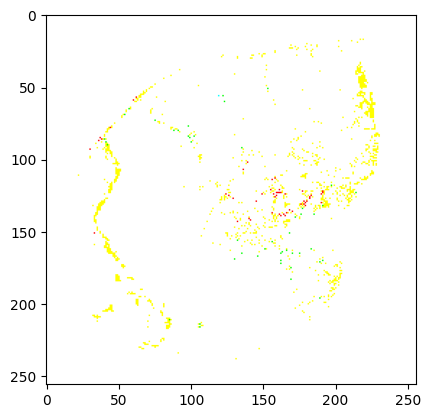

In [10]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy())

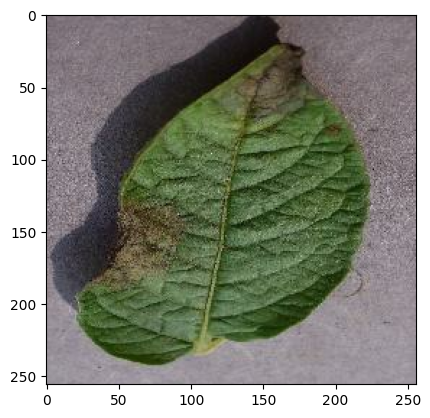

In [11]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

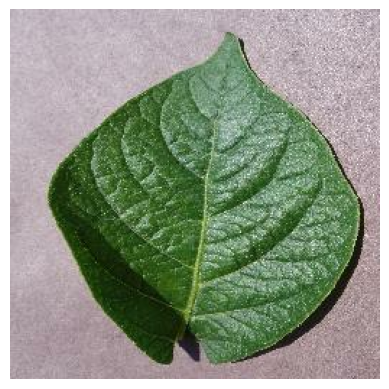

In [12]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")
    # it shuffles image everytime we run 

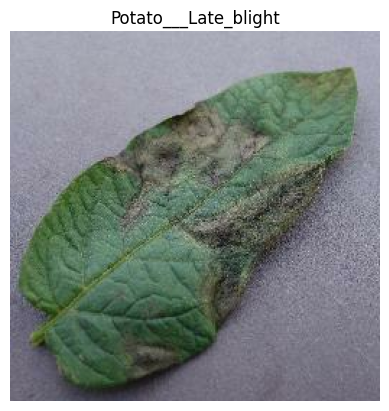

In [13]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")
    # it shuffles image everytime we run 

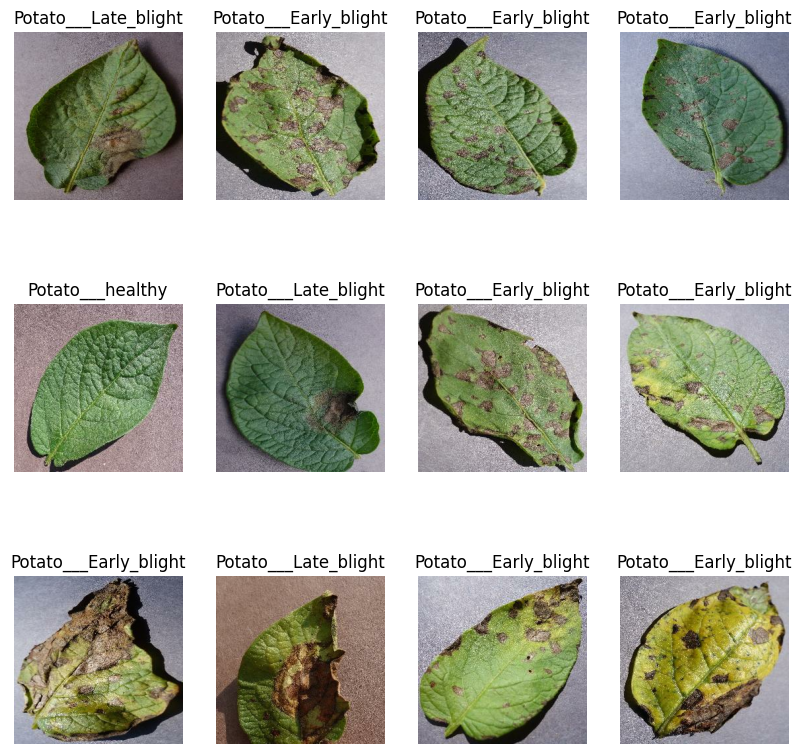

In [14]:
# for displaying i number of images in for loop 
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        # it shuffles image everytime we run 

In [15]:
# each element is 32 batch 
#dividing dataset into training testing data 
# 80% ==>training data 
# 20% ==> 10% ==> validation ,10% ==> test 
# since we do not have train_test_split in tf

In [16]:
train_size =0.8
len(dataset)*train_size

54.400000000000006

In [17]:
train_ds=dataset.take(54)

In [18]:
len(train_ds)

54

In [19]:
test_ds= dataset.skip(54)

In [20]:
len(test_ds)

14

In [21]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [22]:
val_ds=test_ds.take(6)


In [23]:
len(val_ds)

6

In [24]:
test_ds=test_ds.skip(6)

In [25]:
len(test_ds)

8

In [26]:
def get_dataset_partitions_tf(ds,train_split=0.8,test_split=0.1,val_split =0.1,shuffle = True,shuffle_size=10000):
    ds_size =len(ds)
    if shuffle :
        ds=ds.shuffle(shuffle_size,seed =12)
    
    
    train_size = int(train_split*ds_size)
    val_size= int(val_split*ds_size)
    
    train_ds=dataset.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    
    return train_ds,val_ds,test_ds


In [27]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [28]:
len(train_ds)

54

In [29]:
len(test_ds)

8

In [30]:
len(val_ds)

6

In [31]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [32]:
 resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)])

In [33]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),])

In [34]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model = models.Sequential ([ resize_and_rescale,
                              data_augmentation,
                              layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
                              layers.MaxPooling2D((2,2)),
                              layers.Flatten(),
                              layers.Dense(64,activation='relu'),
                              layers.Dense(n_classes,activation='softmax'),
                           
                           
                          ])
model.build(input_shape=input_shape)

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [36]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [37]:
history =model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 114s 2s/step - loss: 0.8968 - accuracy: 0.4994 - val_loss: 0.8828 - val_accuracy: 0.5893
Epoch 2/50
54/54 [==============================] - 104s 2s/step - loss: 0.6438 - accuracy: 0.6944 - val_loss: 0.4658 - val_accuracy: 0.7917
Epoch 3/50
54/54 [==============================] - 94s 2s/step - loss: 0.3699 - accuracy: 0.8443 - val_loss: 0.2710 - val_accuracy: 0.8750
Epoch 4/50
54/54 [==============================] - 94s 2s/step - loss: 0.3498 - accuracy: 0.8559 - val_loss: 0.2612 - val_accuracy: 0.9107
Epoch 5/50
54/54 [==============================] - 96s 2s/step - loss: 0.1696 - accuracy: 0.9329 - val_loss: 0.1882 - val_accuracy: 0.9286
Epoch 6/50
54/54 [==============================] - 99s 2s/step - loss: 0.1375 - accuracy: 0.9462 - val_loss: 0.2477 - val_accuracy: 0.9107
Epoch 7/50
54/54 [==============================] - 94s 2s/step - loss: 0.2222 - accuracy: 0.9144 - val_loss: 0.2265 - val_accuracy: 0.9286
Epoch 8/50
54/54 [

In [38]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 7s 500ms/step - loss: 0.1409 - accuracy: 0.9414


In [39]:
scores

[0.14092643558979034, 0.94140625]

In [40]:
history

In [41]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [43]:
history.history['accuracy']

[0.49942129850387573,
 0.6944444179534912,
 0.8443287014961243,
 0.8559027910232544,
 0.9328703880310059,
 0.9461805820465088,
 0.9143518805503845,
 0.9670138955116272,
 0.9710648059844971,
 0.9733796119689941,
 0.984375,
 0.9716435074806213,
 0.9780092835426331,
 0.9675925970077515,
 0.9849537014961243,
 0.9895833134651184,
 0.9803240895271301,
 0.9716435074806213,
 0.9861111044883728,
 0.9901620149612427,
 0.9855324029922485,
 0.9849537014961243,
 0.9826388955116272,
 0.9704861044883728,
 0.9895833134651184,
 0.9924768805503845,
 0.9809027910232544,
 0.9646990895271301,
 0.9901620149612427,
 0.984375,
 0.9918981194496155,
 0.9965277910232544,
 0.9918981194496155,
 0.9924768805503845,
 0.9820601940155029,
 0.9861111044883728,
 0.9855324029922485,
 0.9959490895271301,
 0.9918981194496155,
 0.9930555820465088,
 0.9936342835426331,
 0.9913194179534912,
 0.9947916865348816,
 0.9878472089767456,
 0.9936342835426331,
 0.9953703880310059,
 0.9895833134651184,
 0.9814814925193787,
 0.97916668

In [44]:
len(history.history['accuracy'])

50

In [45]:
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']


loss = history.history['loss']
val_loss =history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

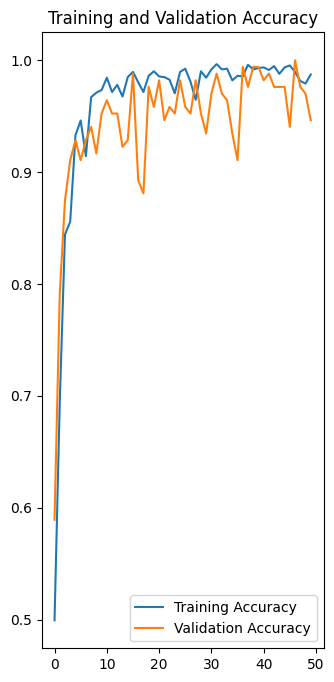

In [46]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

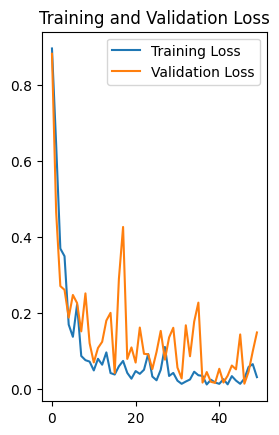

In [47]:
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training Loss")
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

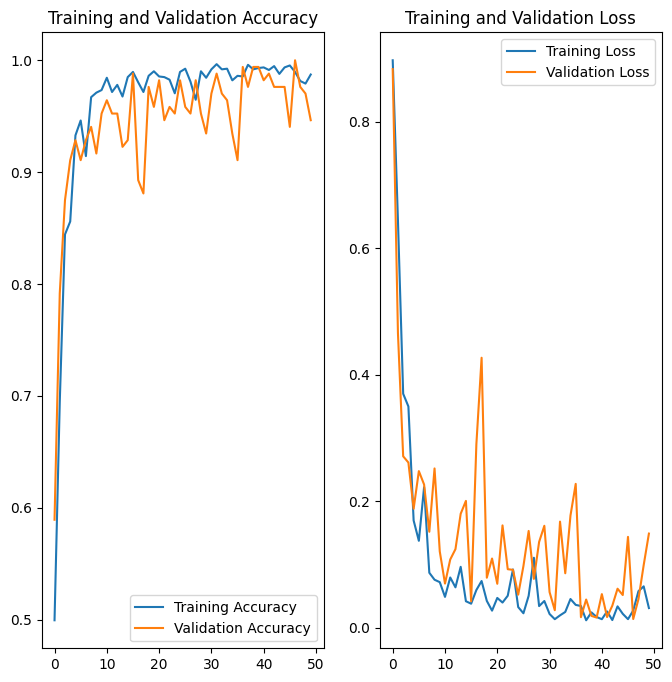

In [48]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training Loss")
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict 
first image's actual label: Potato___Late_blight
1/1 [==============================] - 1s 1s/step
[2.7181753e-03 9.9728143e-01 3.7229267e-07]
predicted label : Potato___Late_blight


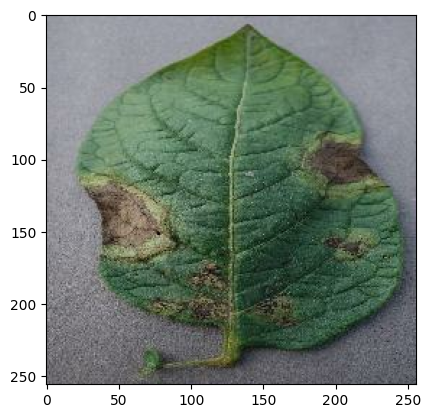

In [49]:
for image_batch,label_batch in dataset.take(1):
    first_image=(image_batch[0].numpy().astype("uint8"))
    first_label=label_batch[0].numpy()
    
    print("first image to predict ")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print(batch_prediction[0])
    print("predicted label :",class_names[np.argmax(batch_prediction[0])])

In [50]:

np.argmax([9.8737389e-01, 1.2625645e-02 ,4.9305282e-07])

0

In [51]:
def predict(model,img):
    img_array= tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array= tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 50ms/step


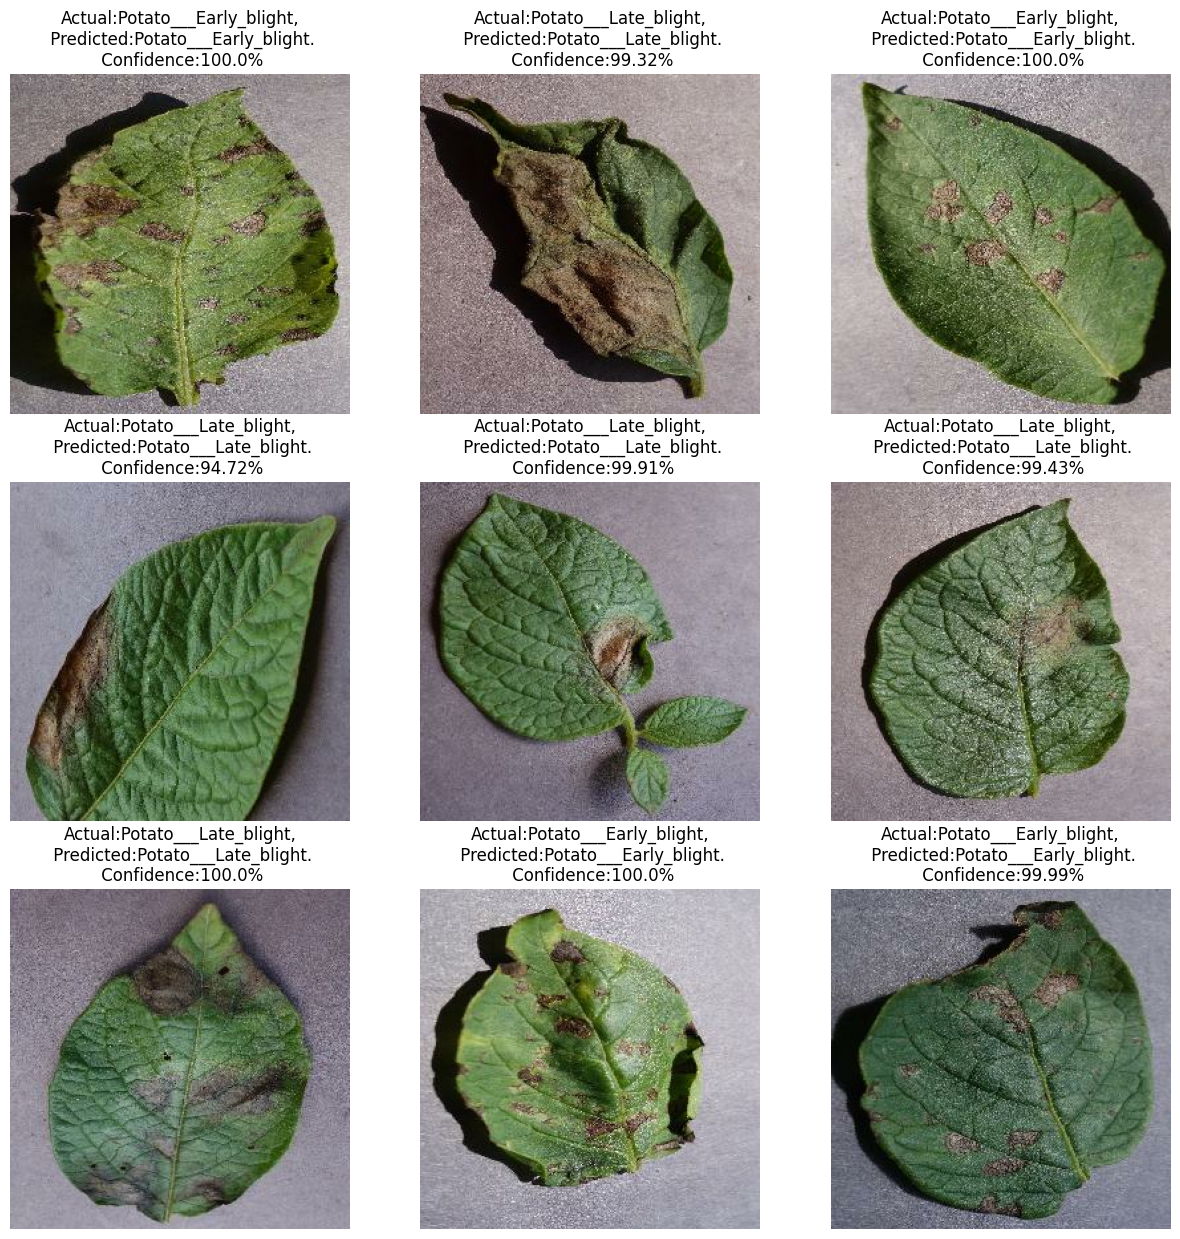

In [52]:
plt.figure(figsize=(15,15))
for image,labels in test_ds.take(1):
    for i in range (9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        predicted_class,confidence=predict(model,image[i].numpy())
        
        actual_class=class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%")
        plt.axis("off")

In [53]:
import os
model_version=1
model.save("potato_leaf_disease_detection_model")

INFO:tensorflow:Assets written to: potato_leaf_disease_detection_model\assets


INFO:tensorflow:Assets written to: potato_leaf_disease_detection_model\assets


In [57]:
import os
model_version = max([int(i) for i in (os.listdir("./model_versions")+[0])])+1
model.save(f"./model_versions/{model_version}")

INFO:tensorflow:Assets written to: ./model_versions/3\assets


INFO:tensorflow:Assets written to: ./model_versions/3\assets
